<a href="https://colab.research.google.com/github/Ganesh1009/MachineLearning/blob/master/Bayesian_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
def f_x(x):
  return np.sin(2*np.pi*x)

def error(x):
  return np.random.normal(loc = 0, scale = 0.3, size=x.size);

def build_design_matrix(x):

  p = 7
  s = 0.1

  design_matrix = np.zeros(shape=(x.size, p))
  
  design_matrix[ : , 0] = 1

  for i in range(1, p):
    design_matrix[ : , i] = np.exp(-(x-i/10)**2/(2*s))
  
  return design_matrix

class BayesianLinearModel():

  def __init__(self, data_variance, prior_covariance):
    
    self.data_variance = data_variance
    self.prior_covariance = prior_covariance

  def fit(self, x, y):
    
    phi = build_design_matrix(x)
    r,c = phi.shape
    self.posterior_covariance = np.linalg.pinv(self.prior_covariance*np.eye(c) + self.data_variance*phi.T@phi)
    self.posterior_mean = self.data_variance*self.posterior_covariance@phi.T@y

    return self
  
  def predict(self, x):

    phi = build_design_matrix(x)
    predictive_mean = phi@self.posterior_mean
    predictive_cov = (1/self.data_variance) + phi@self.posterior_covariance@phi.T 
    
    return predictive_mean, np.sqrt(np.diag(predictive_cov)), predictive_cov
    


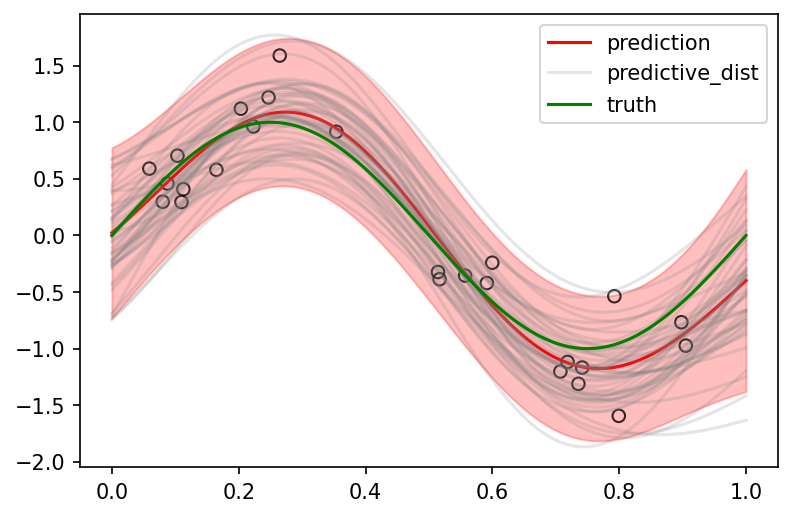

In [107]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(25)
y = f_x(x) + error(x) 


model = BayesianLinearModel((1/0.3)**2, 0.010).fit(x,y)

X_test = np.linspace(0,1,1000)
mean, std_dev, cov = model.predict(X_test)

samples = np.random.multivariate_normal(mean, cov, 50)
fig, ax = plt.subplots(dpi=150)

plt.fill_between(X_test, mean - 2*std_dev, mean + 2*std_dev, color = 'red', alpha = 0.25)
plt.plot(X_test, mean, color ='red', label = 'prediction')

plt.plot(X_test, samples[0], color ='gray', alpha = 0.20, label = 'predictive_dist')
for i in range(1,50):
  plt.plot(X, samples[i], color ='gray', alpha = 0.20)

plt.plot(X_test, f_x(X) , color = 'green', label = 'truth')
plt.scatter(x,y, marker =  'o', alpha = 0.8, edgecolor = 'k', facecolor ='None')
plt.legend(loc='best')
plt.show()
